In [6]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

batch_size = 32
block_size = 512


def get_batch(data):
    ix = torch.randint(len(data) - block_size, (batch_size,))
    print(ix)
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [7]:
data = torch.randn((1000))
data.size()

torch.Size([1000])

In [8]:
x, y = get_batch(data)
x.size(), y.size()

tensor([298,  36, 485, 398, 478, 415, 213, 414,  75, 174, 174, 215, 292, 463,
        228, 216, 394, 471, 265, 468, 387,  70, 167, 389,   1, 185, 457, 346,
        203,  20, 316, 144])


(torch.Size([32, 512]), torch.Size([32, 512]))

In [10]:
x

tensor([[ 0.6622, -0.1713,  0.0137,  ...,  1.8254, -1.7514,  0.5758],
        [ 0.4835,  0.2532,  0.1748,  ...,  0.3878,  1.3287,  1.0314],
        [ 0.8357, -0.1912, -0.4461,  ...,  0.0972, -0.1021, -0.7441],
        ...,
        [ 0.4724,  0.1179, -0.2373,  ..., -0.1339,  0.4963, -0.8573],
        [-0.4516, -0.6836,  1.6792,  ..., -0.9584, -1.3133, -1.8018],
        [-1.5091,  1.3658,  0.0984,  ..., -0.2807,  0.9801,  0.7553]])

In [2]:
import torch.nn as nn
import torch
from torch.nn import functional as F
from Embedding.CausalConv1D import CausalConv1d
from torch import Tensor
from torch.nn import Conv1d 
from lampe.nn import ResMLP
 

In [3]:
class SoftClip(nn.Module):
    def __init__(self, bound: float = 1.0):
        super().__init__()

        self.bound = bound

    def forward(self, x: Tensor) -> Tensor:
        return x / (1 + abs(x / self.bound))

In [4]:

layers = nn.Sequential(
            SoftClip(100.0),
            CausalConv1d(in_channels=1, out_channels=32, dilation= 1, kernel_size=32, A=True, bias = True, stride = 1), #
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 2, kernel_size=32, A=False, bias = True, stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 2, kernel_size=32, A=False, bias = True, stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 4, kernel_size=32, A=False, bias = True,  stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 4, kernel_size=32, A=True, bias = True, stride = 1), #
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 8, kernel_size=32, A=False, bias = True, stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 8, kernel_size=32, A=False, bias = True, stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 16, kernel_size=32, A=False, bias = True,  stride = 1), 
            nn.LeakyReLU(),     
            CausalConv1d(in_channels=32, out_channels=32, dilation= 16, kernel_size=32, A=False, bias = True,  stride = 1), 
            nn.LeakyReLU(),        
            CausalConv1d(in_channels=32, out_channels=32, dilation= 32, kernel_size=32, A=False, bias = True, stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=32, dilation= 32, kernel_size=32, A=False, bias = True,  stride = 1), 
            nn.LeakyReLU(), 
            CausalConv1d(in_channels=32, out_channels=1, dilation= 32, kernel_size=32, A=False, bias = True,  stride = 1), 
            nn.LeakyReLU(), 
            # Conv1d(in_channels=64, out_channels=128, kernel_size=64, stride= 32), 
            # nn.LeakyReLU(),
            # Conv1d(in_channels=128, out_channels=64, kernel_size=64, stride= 32), 
            # nn.LeakyReLU(),
             )


In [6]:
# x = torch.randn((16, 6144))
x = x[:,0]
x = x.unsqueeze(1)
# x = torch.randn((16, 2, 8))
x.size()

torch.Size([16, 1, 6144])

In [7]:
x = layers(x)
print(x.size())
f = nn.Flatten()
f(x).size()

torch.Size([16, 1, 1275])


torch.Size([16, 1275])

In [10]:
r = ResMLP(1275 , 64, hidden_features=[512] * 2 + [256] * 3 + [128] * 5, 
                activation=nn.ELU,
            )



In [14]:
torch.isnan(r(x)).sum()

tensor(0)

torch.Size([16, 19]) torch.Size([16, 2, 6144])


(torch.Size([6144]), torch.Size([6144]), torch.Size([6144]))

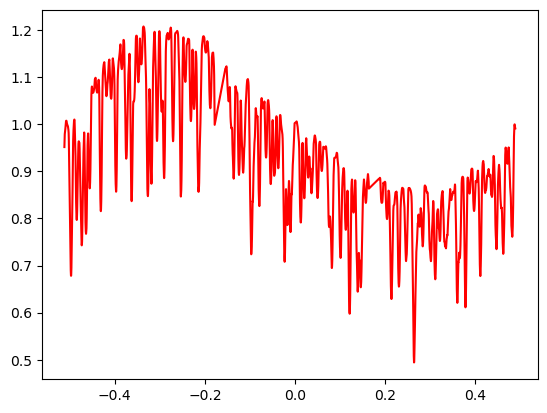

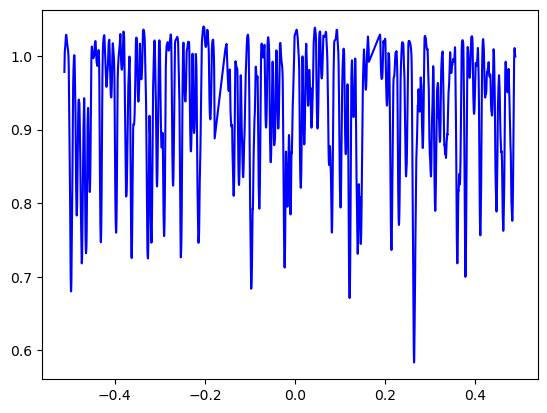

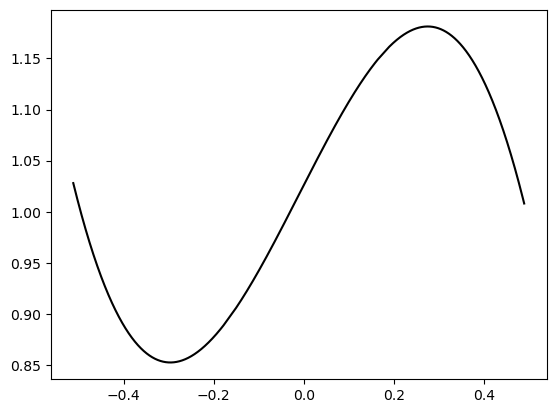

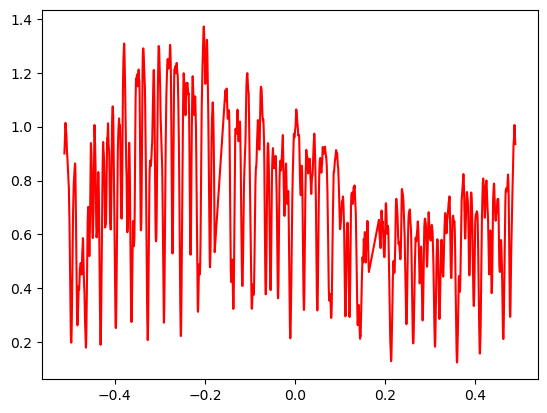

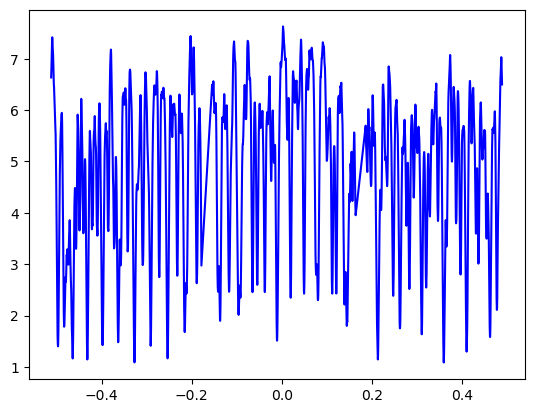

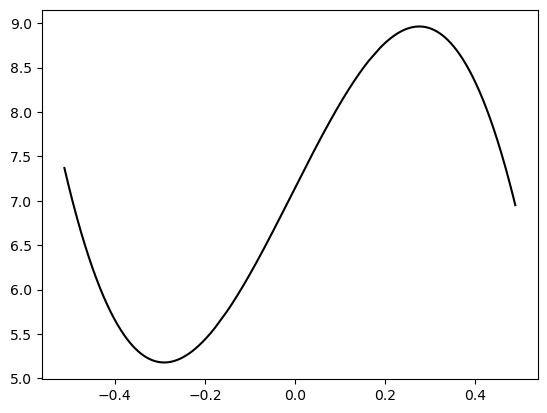

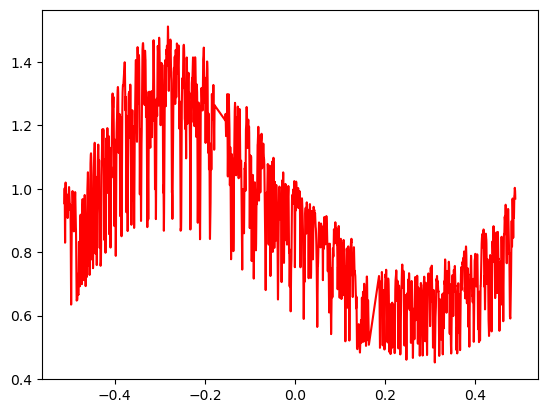

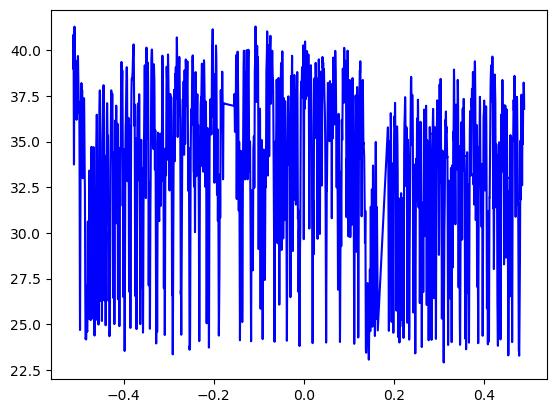

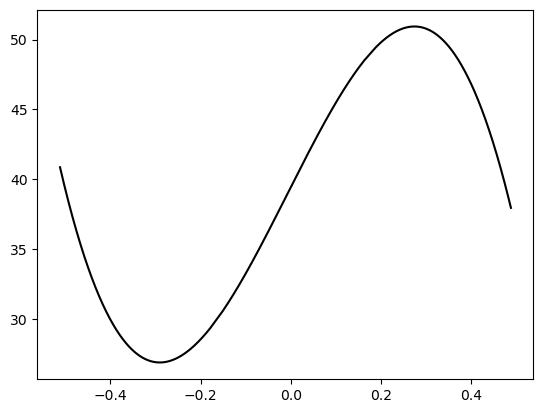

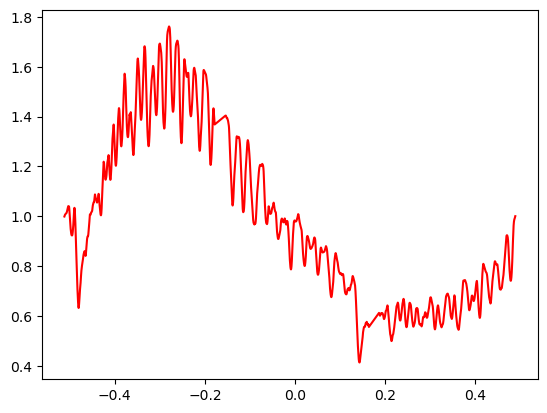

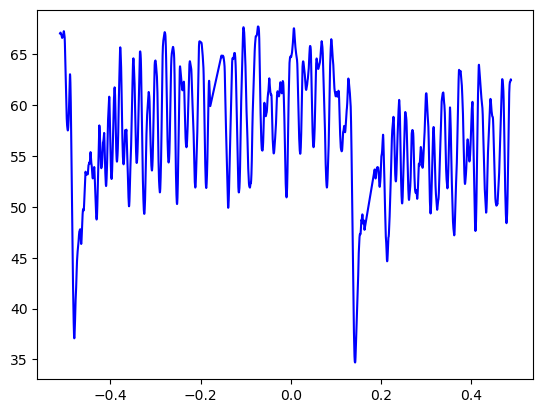

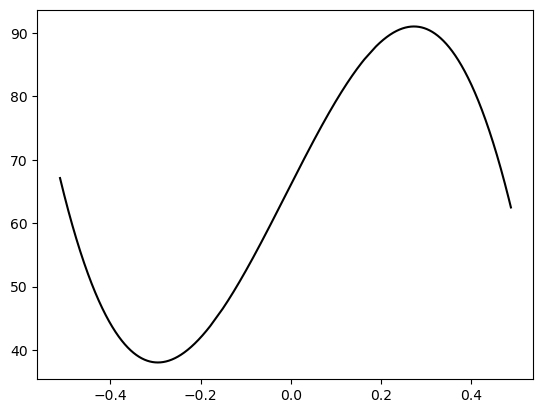

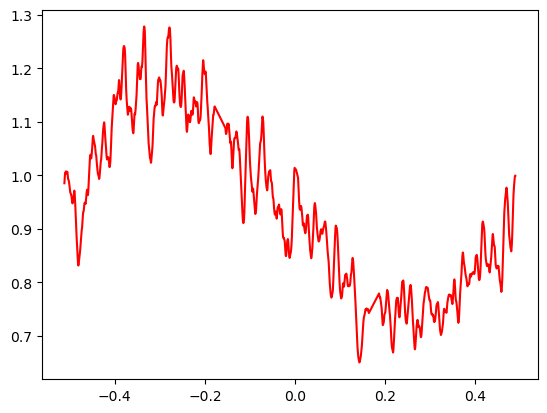

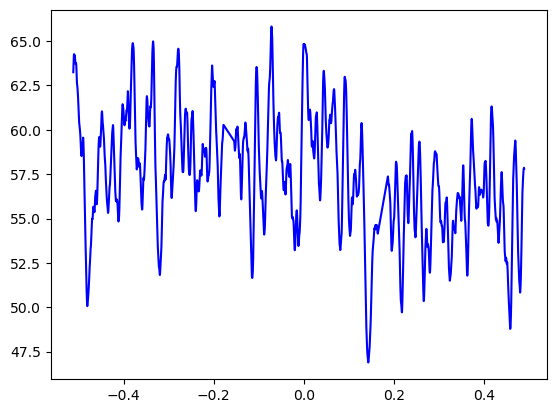

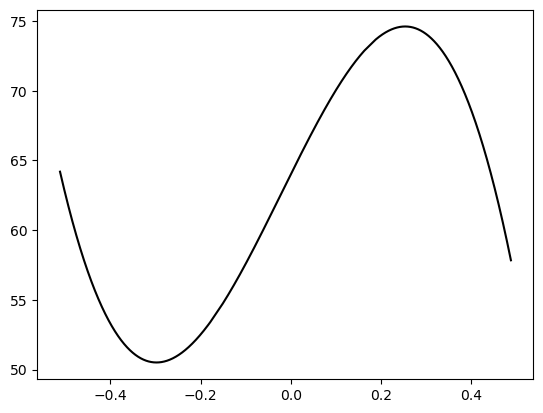

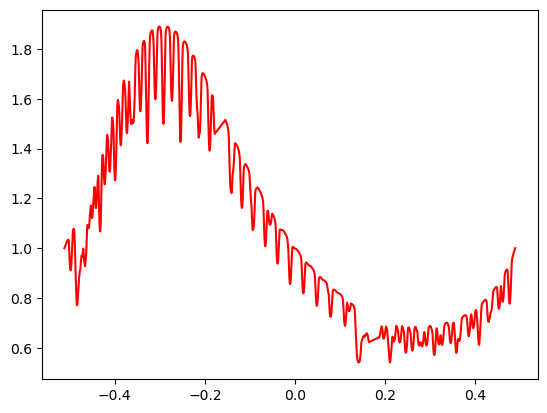

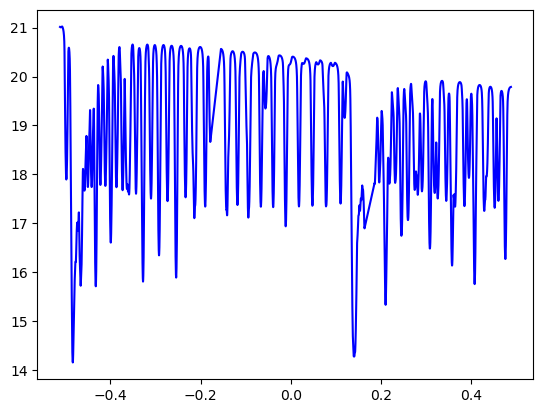

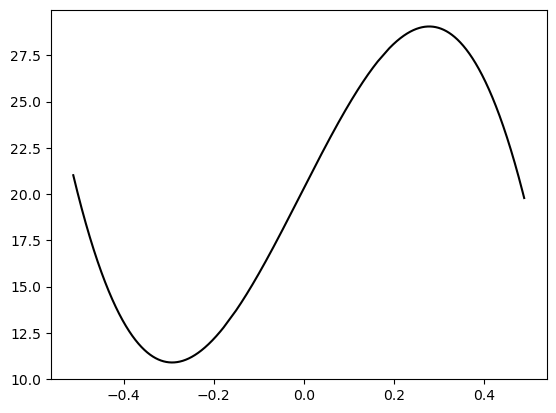

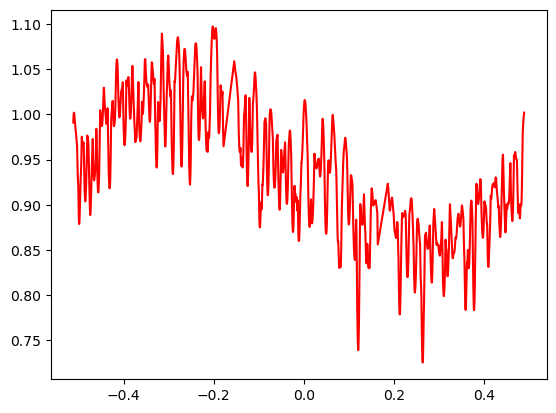

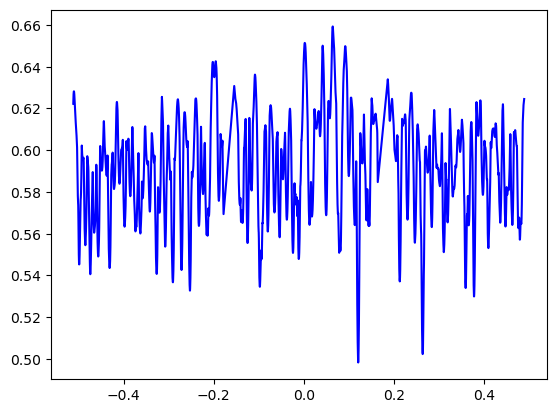

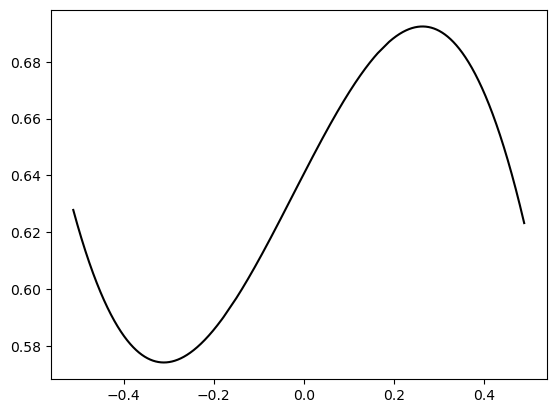

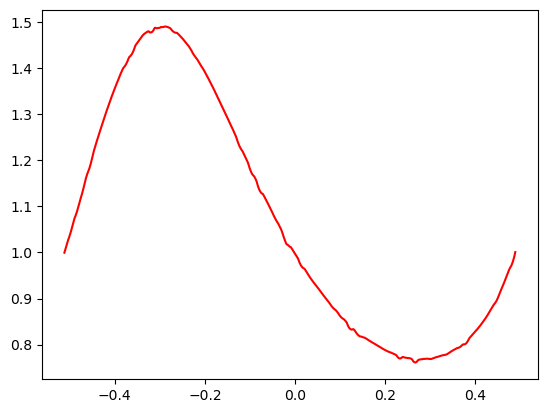

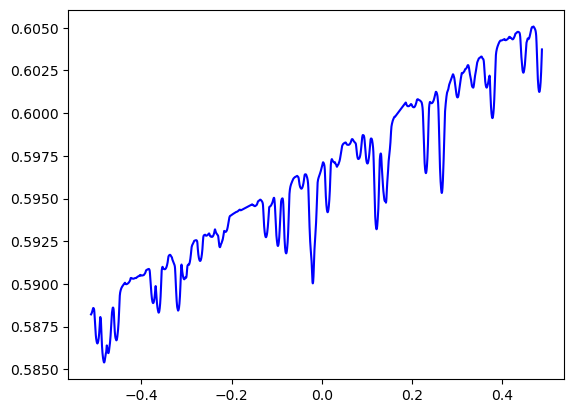

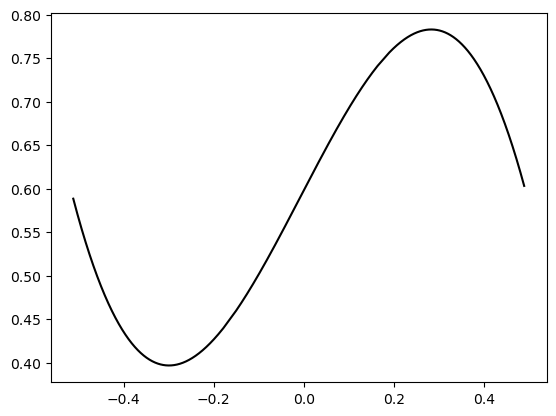

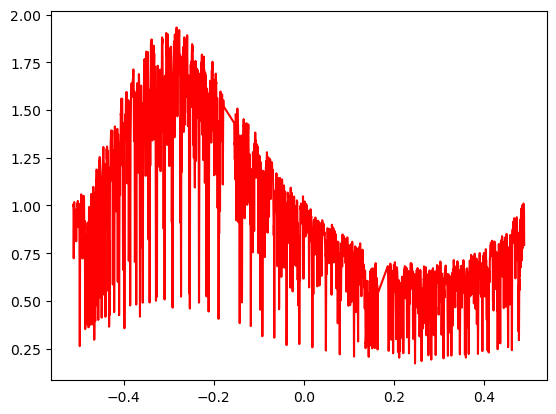

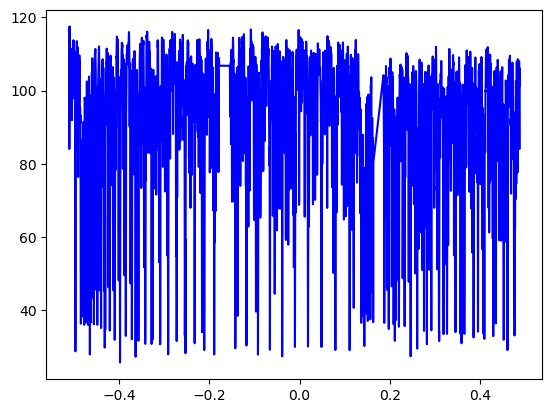

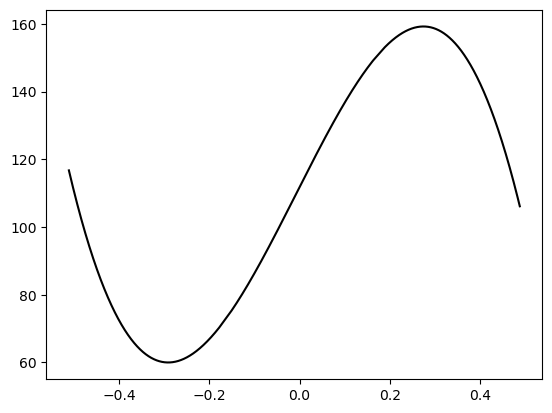

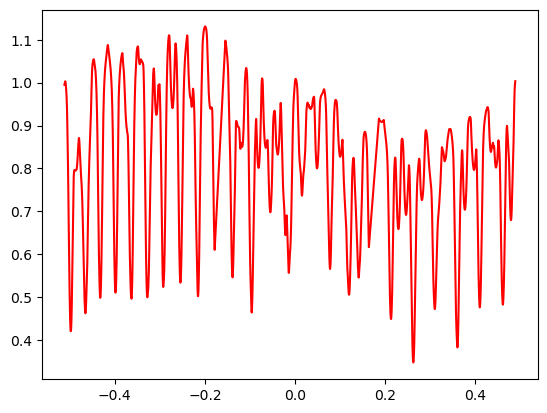

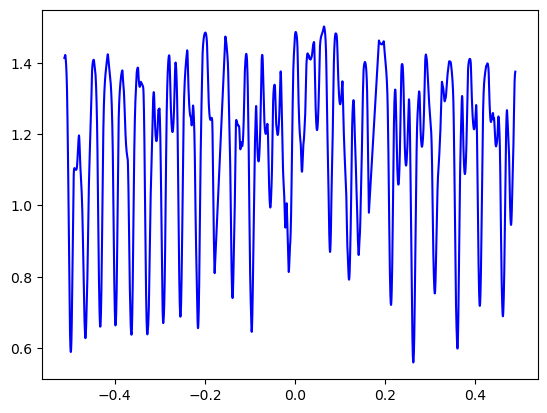

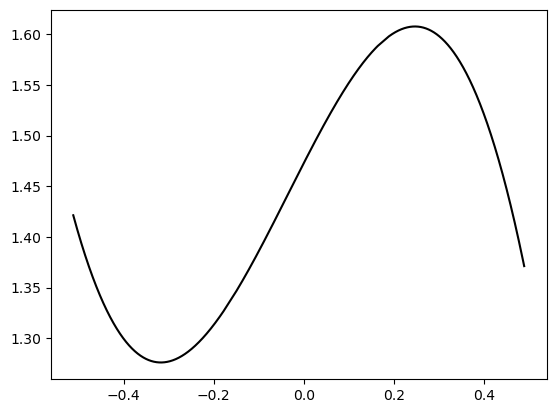

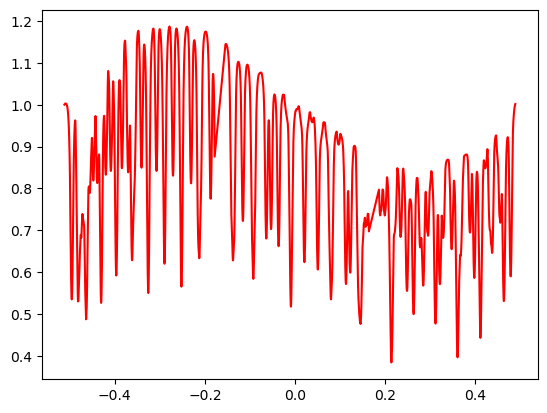

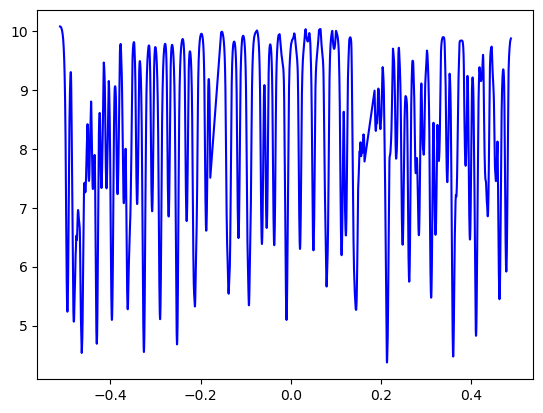

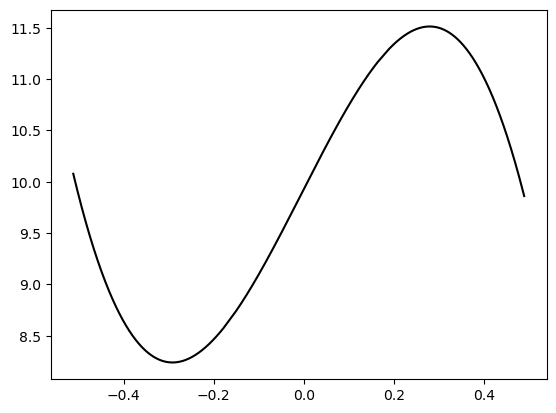

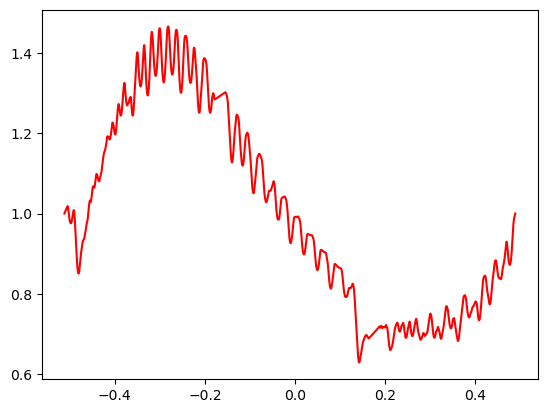

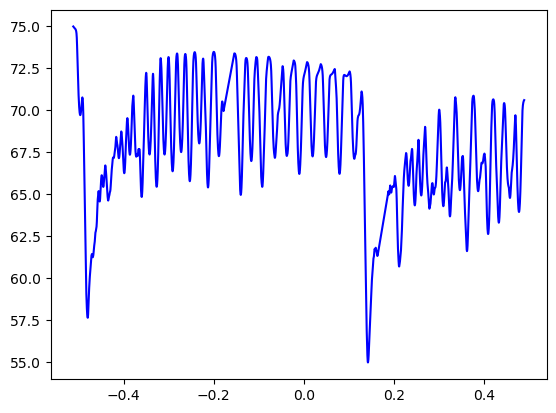

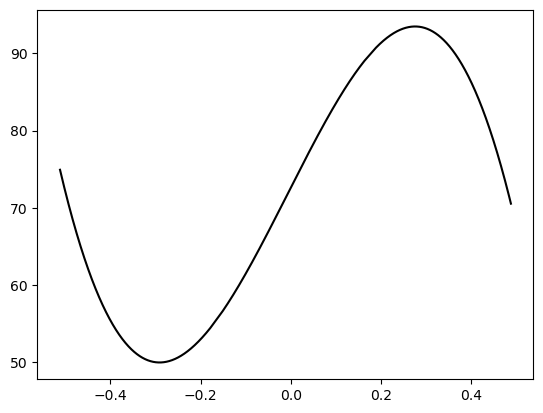

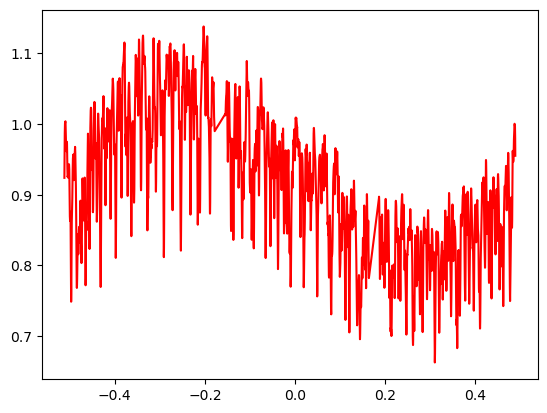

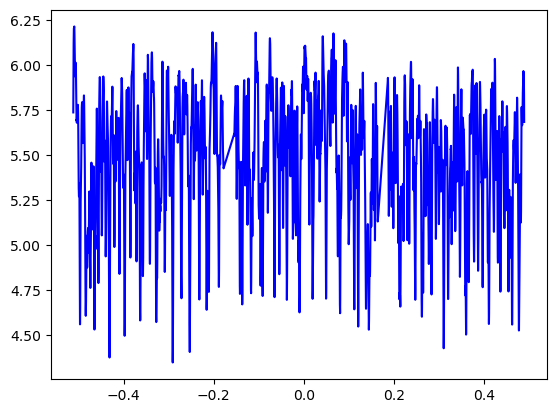

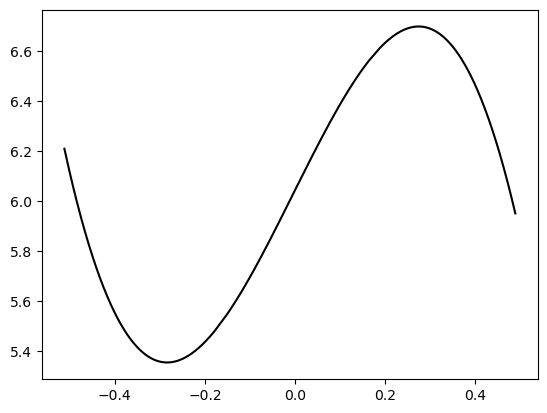

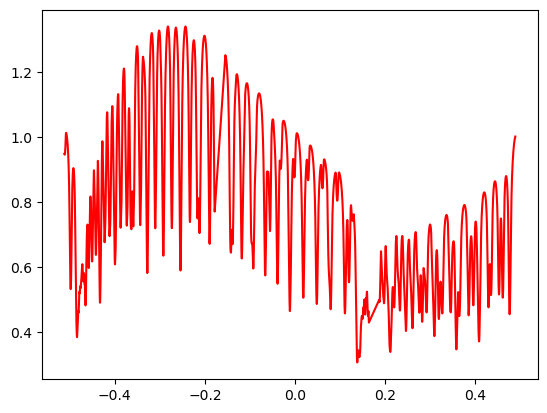

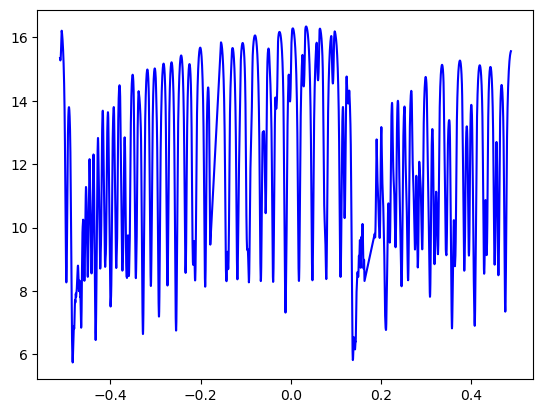

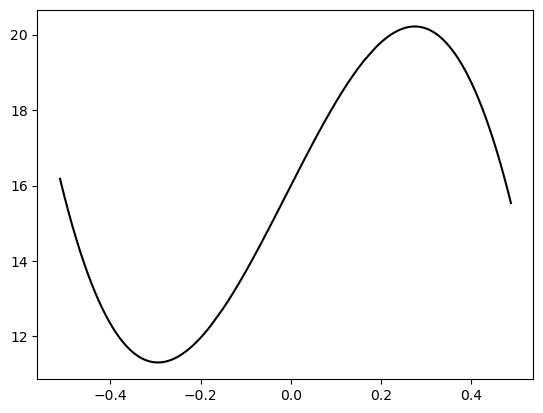

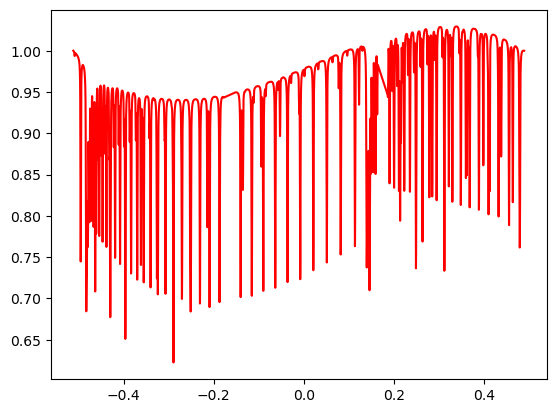

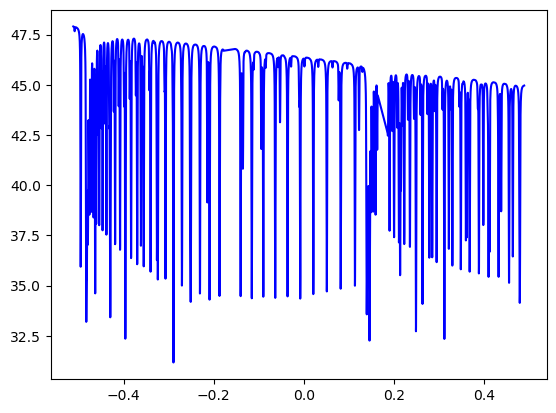

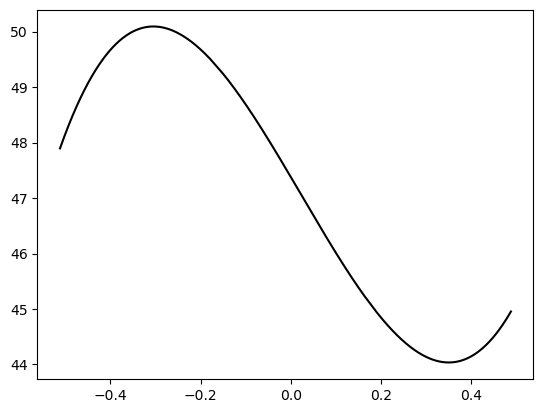

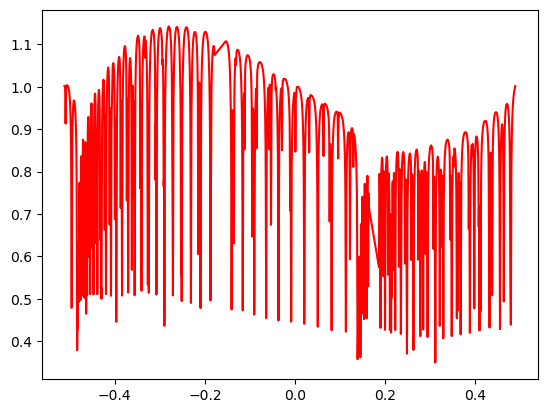

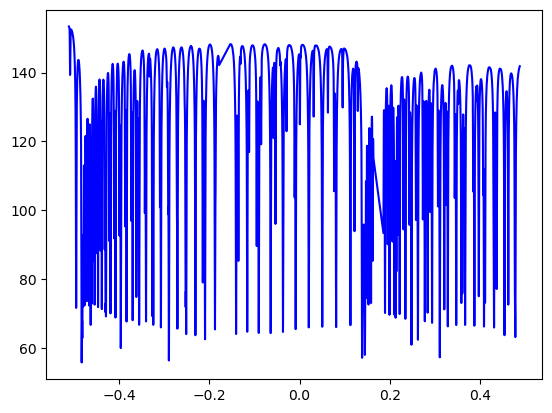

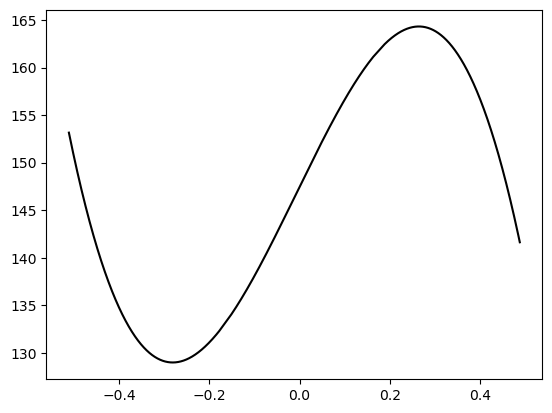

In [ ]:
'''
TO DO 

- check if the full theta has the same wavelengths
- if not interpolate, if yes, keep
- try attention layers on it now that it only has 1 channel 
- try causalconv1d with and without normalizing spectra /softclip with 1/2 channels 

'''

In [4]:
from Embedding.MHA import GPTLanguageModel
import torch
import torch.nn as nn 

x = torch.randn((16,6144))
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
attention = GPTLanguageModel(128, 4, 8, 377, device)  #n_embedding, n_head, n_blocks, block_size

/home/mvasist/miniconda3/envs/HighResear/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [3]:
attention(x)

torch.Size([16, 6144, 128])


IndexError: index out of range in self

In [6]:
position_embedding_table = nn.Embedding(128, 256)
y = torch.randn((16, 6144))

In [8]:
position_embedding_table(y.long())

IndexError: index out of range in self

In [1]:
from DataProcuring import Data 
from train_new import plots
from pathlib import Path
import torch
import pandas as pd

ImportError: cannot import name 'LABELS' from partially initialized module 'train_new' (most likely due to a circular import) (/home/mvasist/Highres/train_new.py)

In [10]:
LABELS, LOWER, UPPER = zip(*[
[                  r'$T1$',  300,   3500],      # T_bottom
[                  r'$T2$',  300,   3500],   # temp_node_1
[                  r'$T3$',  300,   3500],   # temp_node_2
[                  r'$log_delta$', 3.0, 8.0],   # temp_node_3
[                  r'$alpha$',  1.0, 2.0],   # temp_node_4
[                  r'$Tint$',  300,   3500],   # temp_node_5
[                  r'$FeH$',  -1.5, 1.5],   # temp_node_9
[                  r'$CO$',  0.1, 1.6],  # CO_mol_scale
[                  r'$\log g$',   2.5, 5.5],          # log g
[                  r'$log_Pquench$', -6.0, 3.0],   # temp_node_6
[                  r'$log_iso_rat$',  -11.0, -1.0],   # temp_node_7
[                  r'$fsed$',  0.0, 10.0],   # temp_node_8
[                  r'$logKzz$',  5.0, 13.0], # H2O_mol_scale \_mol\_scale
[                  r'$sigmalnorm$',  1.05, 3.0], # C2O_mol_scale
[                  r'$logFe$',  -2.3, 1.0], # CH4_mol_scale
[                  r'$R_P$', 0.8, 2.0],             # R_P / R_Jupyter
[                  r'$rv$',  20.0, 35.0], # NH3_mol_scale
[                  r'$limb_dark$',  0.0, 1.0], # PH3_mol_scale
[                  r'$vsini$',  10.0, 30.0], # H2S_mol_scale
])

runpath = '/scratch/users/mvasist/highres-sbi/runs/sweep/ruby-energy-41_xzxzcc6t'
d = Data()
plots = plots(Path(runpath), int(1024))
x_star = d.flux*d.flux_scaling

In [20]:
df_theta = pd.read_csv('/scratch/users/mvasist/highres-sbi/runs/sweep/ruby-energy-41_xzxzcc6t/plots_1024/theta.csv')
theta = df_theta.values
theta = torch.from_numpy(theta)


In [23]:
theta = torch.Tensor(LOWER) + theta * (torch.Tensor(UPPER) - torch.Tensor(LOWER))

In [24]:
theta

tensor([[1.7991e+03, 1.8342e+03, 1.0983e+03,  ..., 3.0530e+01, 9.5931e-01,
         1.3663e+01],
        [5.6680e+02, 2.2967e+03, 8.1469e+02,  ..., 2.5327e+01, 4.8831e-01,
         1.5039e+01],
        [1.7517e+03, 3.1719e+03, 2.4354e+03,  ..., 3.1333e+01, 9.1115e-01,
         2.6660e+01],
        ...,
        [2.2218e+03, 1.5100e+03, 3.2205e+03,  ..., 2.0026e+01, 8.6030e-01,
         1.3138e+01],
        [2.1665e+03, 1.3107e+03, 2.8603e+03,  ..., 2.6715e+01, 6.9046e-01,
         2.7048e+01],
        [1.8903e+03, 2.3911e+03, 2.9245e+03,  ..., 3.0761e+01, 8.6779e-01,
         1.9081e+01]], dtype=torch.float64)

In [22]:
from lampe.data import H5Dataset
import os
from pathlib import Path
import torch
from tqdm import tqdm
from itertools import islice

In [23]:
scratch = os.environ['SCRATCH']
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'

In [24]:
testset = H5Dataset(datapath / 'test.h5', batch_size=2**4)

In [25]:
# d = Data()
ranks = []

with torch.no_grad():
    for theta, x in tqdm(islice(testset, 2**8)):
        theta, x = theta.cuda(), x.cuda()
        x = x[:,0]
        print(x.size())
#         x = noisy(x)
#         print(x.size())
#         posterior = estimator.flow(x)
#         samples = posterior.sample((2**10,))
#         log_p = posterior.log_prob(theta)
#         log_p_samples = posterior.log_prob(samples)

#         ranks.append((log_p_samples < log_p).float().mean(dim=0).cpu())

# ranks = torch.cat(ranks)
# ecdf_fig = coverage_plot(ranks, coverages = np.linspace(0, 1, 256))

256it [00:11, 22.39it/s]

torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size([16, 6144])
torch.Size(

In [4]:
from DataProcuring import *
import pandas as pd

In [2]:
d = Data()
d.flux

array([47241.60883395, 47241.60883395, 47241.60883395, ...,
       43732.7703355 , 43732.7703355 , 43732.7703355 ])

In [ ]:
d.data_wavelengths

In [5]:
df_from_arr = pd.DataFrame(data=[d.data_wavelengths, d.flux, d.err]).T
print(df_from_arr)


             0             1            2
0     2.321521  47241.608834  1202.395810
1     2.321529  47241.608834  1202.395810
2     2.321537  47241.608834  1202.395810
3     2.321545  47241.608834  1202.395810
4     2.321553  47241.608834  1202.395810
...        ...           ...          ...
6139  2.369421  43732.770336  1341.211517
6140  2.369428  43732.770336  1341.211517
6141  2.369434  43732.770336  1341.211517
6142  2.369441  43732.770336  1341.211517
6143  2.369448  43732.770336  1341.211517

[6144 rows x 3 columns]


In [6]:
df_from_arr.iloc[:, 2]

0       1202.395810
1       1202.395810
2       1202.395810
3       1202.395810
4       1202.395810
           ...     
6139    1341.211517
6140    1341.211517
6141    1341.211517
6142    1341.211517
6143    1341.211517
Name: 2, Length: 6144, dtype: float64

In [7]:
from lampe.data import H5Dataset


In [8]:
ses = H5Dataset('samples_000321.h5')

OSError: Unable to open file (bad object header version number)